### Importing all reqiued labraries

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

### reding the dataset

In [5]:
churn_df = pd.read_csv("Churn_dataset.csv")
churn_df.head() 

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### here finding the numbers of rows and columns and the datatype of each column

In [6]:
churn_df.shape

(7043, 21)

In [7]:
churn_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### get the stastic of the dataset

In [8]:
churn_df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## count the values in the column churn of graph

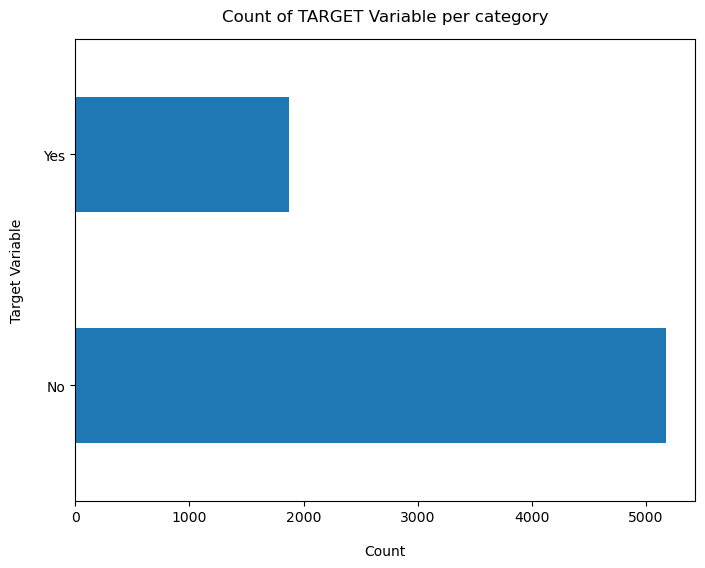

In [9]:
churn_df['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

### count the values in the column churn in %

In [10]:
100*churn_df['Churn'].value_counts()/len(churn_df['Churn'])

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

### count the values in the column churn

In [11]:
churn_df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

* Data is highly imbalanced, ratio = 73:27


In [12]:
churn_df.info(verbose = True) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Copy the dataset so main dataset remaines same

In [13]:
churn_data = churn_df.copy()

### Calculating total null values

In [14]:
churn_data.TotalCharges = pd.to_numeric(churn_data.TotalCharges, errors='coerce')
churn_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### check which rows has missing values

In [15]:
churn_data.loc[churn_data ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


### Becaues the count of rowa consist is low so we going to drop it

In [16]:
churn_data.dropna(how = 'any', inplace = True)
churn_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### getting max value in the tenure column

In [17]:
print(churn_data['tenure'].max())

72


## making the group in column tenure e.g if it in < 12 the group is 1-12 

In [18]:
# Group the tenure in bins of 12 months
labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

churn_data['tenure_group'] = pd.cut(churn_data.tenure, range(1, 80, 12), right=False, labels=labels)

In [19]:
churn_data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

### Droping unnesarry columns

In [20]:
#drop column customerID and tenure
churn_data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Univariate Analysis

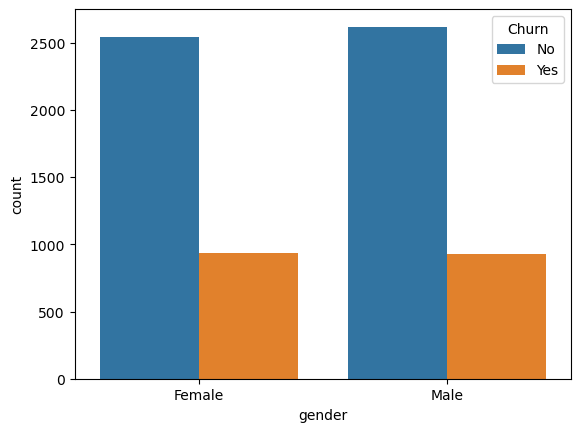

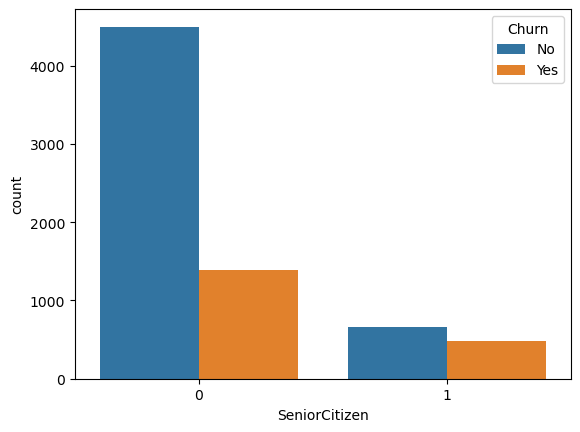

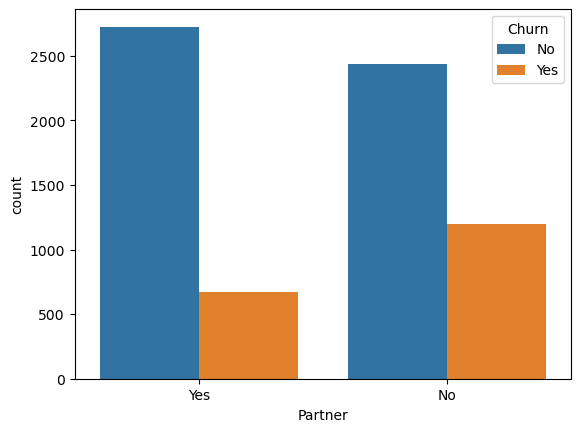

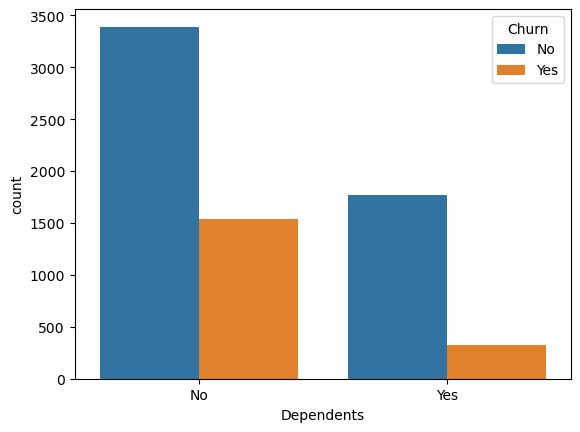

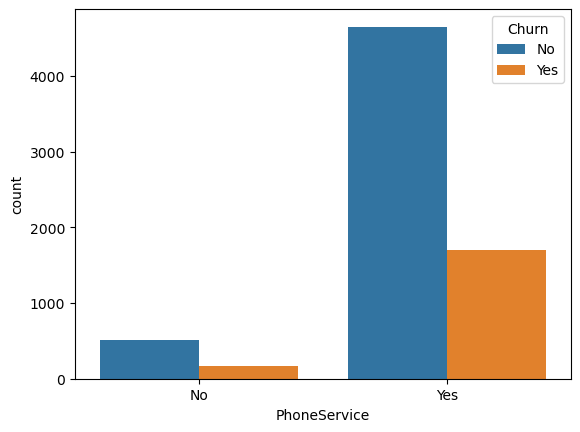

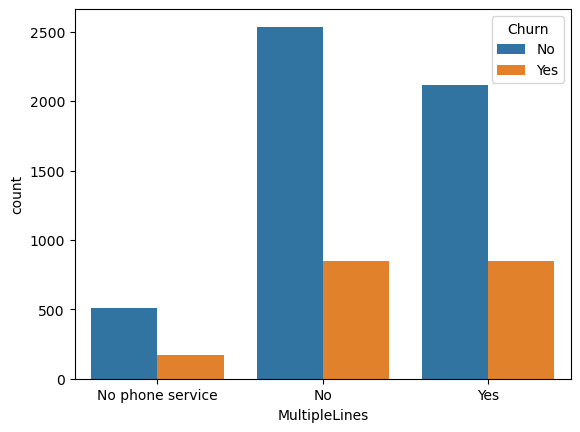

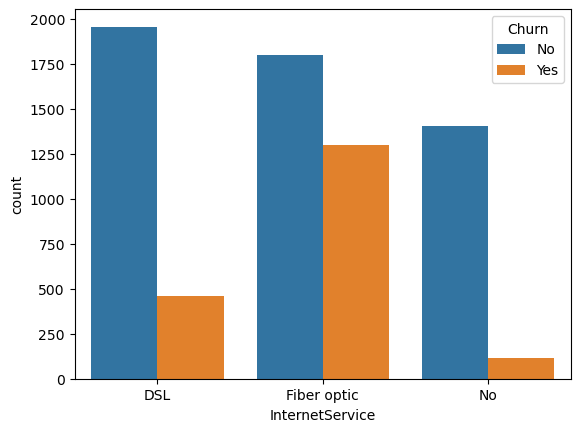

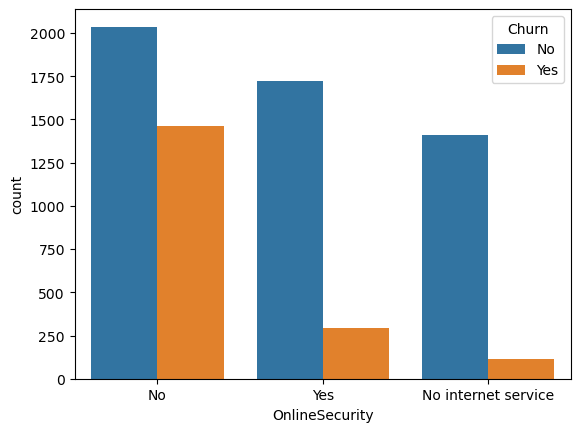

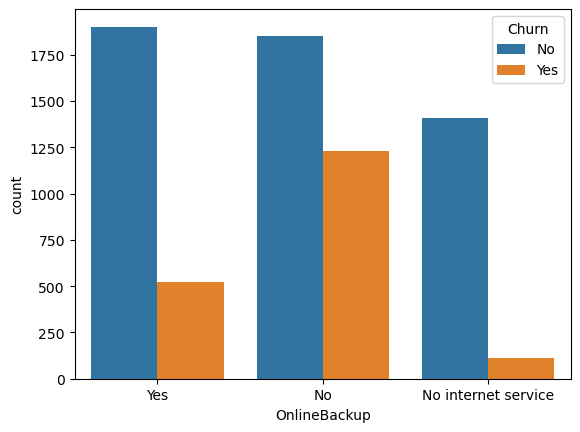

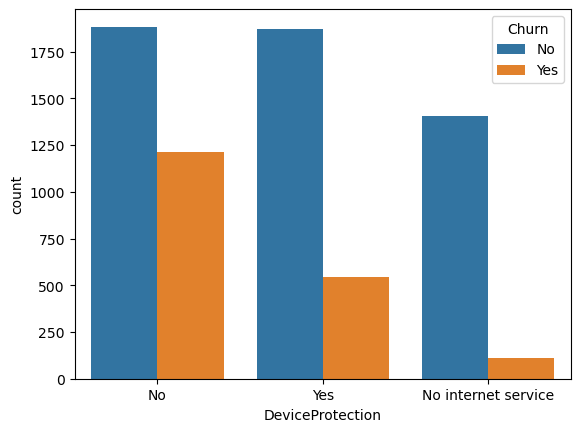

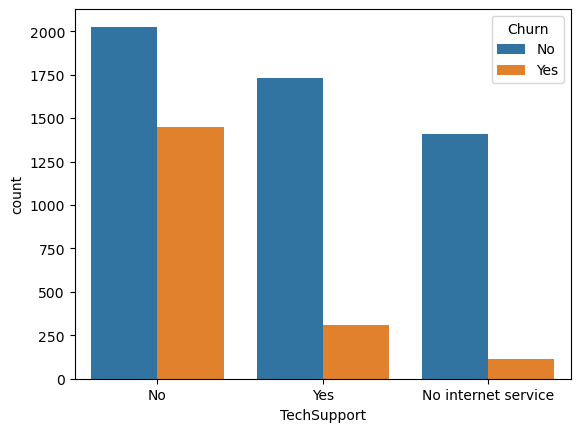

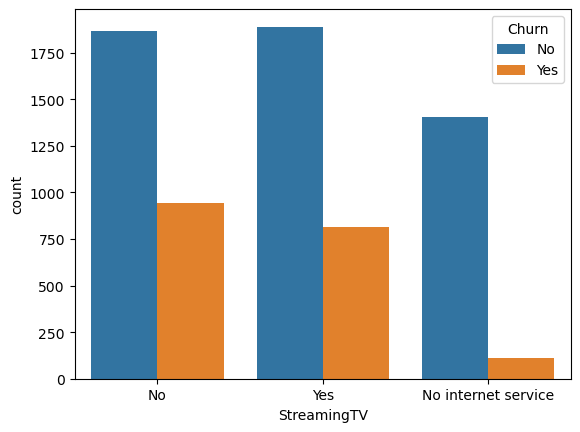

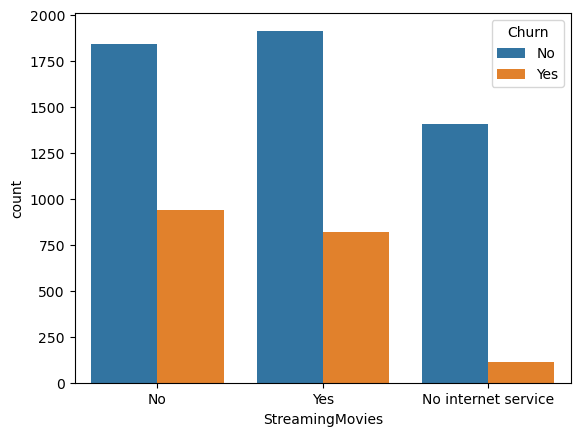

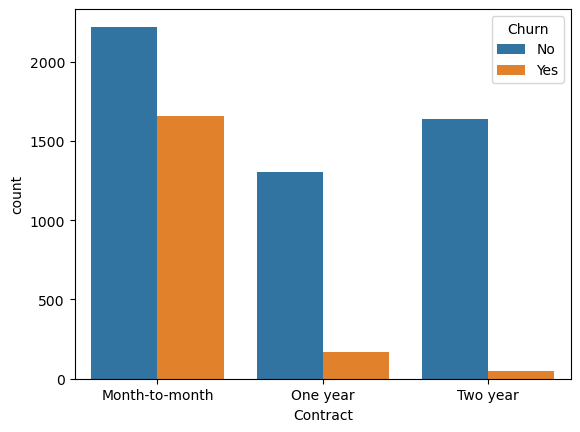

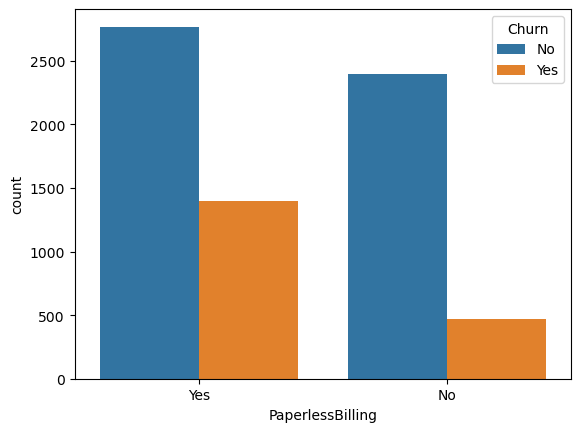

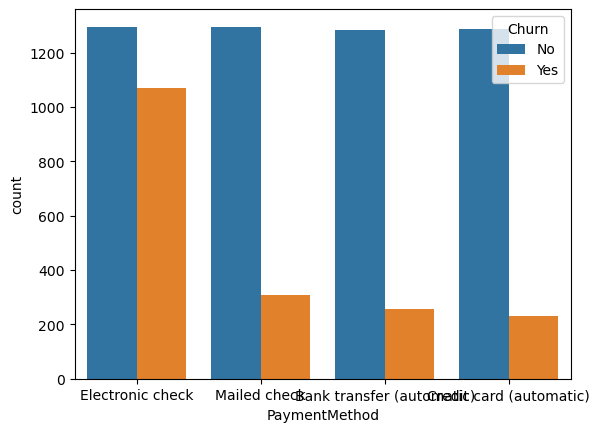

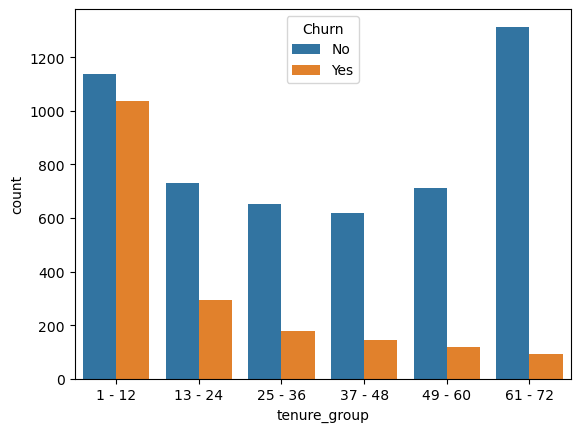

In [21]:
for i, predictor in enumerate(churn_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=churn_data, x=predictor, hue='Churn')

# Convert the target variable 'Churn'  in a binary numeric variable

In [22]:
churn_data['Churn'] = np.where(churn_data.Churn == 'Yes',1,0)
churn_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**.** Convert all the categorical variables into dummy variables

In [23]:
churn_data_dummies = pd.get_dummies(churn_data)
churn_data_dummies = churn_data.replace({"Yes": 1, "No": 0})

churn_data_dummies.head()

C:\Users\patil\AppData\Local\Temp\ipykernel_7960\306358119.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_data_dummies = churn_data.replace({"Yes": 1, "No": 0})


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,0,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,0,0,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,0,0,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1 - 12


* Relationship between Monthly Charges and Total Charges

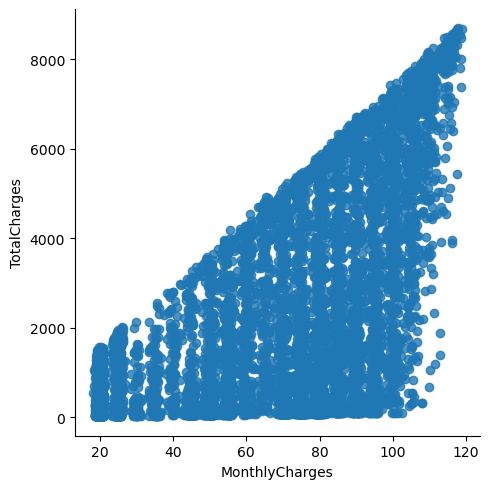

In [24]:
sns.lmplot(data=churn_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

* churn by monthly charges

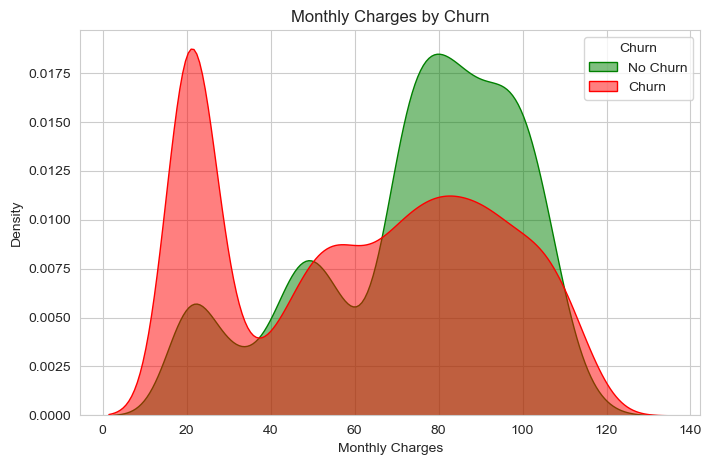

In [ ]:
plt.figure(figsize=(8, 5))
sns.set_style("whitegrid")

sns.kdeplot(data=churn_data_dummies, x="MonthlyCharges", hue="Churn",
            fill=True, common_norm=False, palette={0: "red", 1: "green"}, alpha=0.5)

plt.ylabel("Density"))
plt.xlabel("Monthly Charges")
plt.title("Monthly Charges by Churn")
plt.legend(title="Churn", labels=["No Churn", "Churn"])
plt.show()

C:\Users\patil\AppData\Local\Temp\ipykernel_7960\1138506716.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies["Churn"] == 0) ],
C:\Users\patil\AppData\Local\Temp\ipykernel_7960\1138506716.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

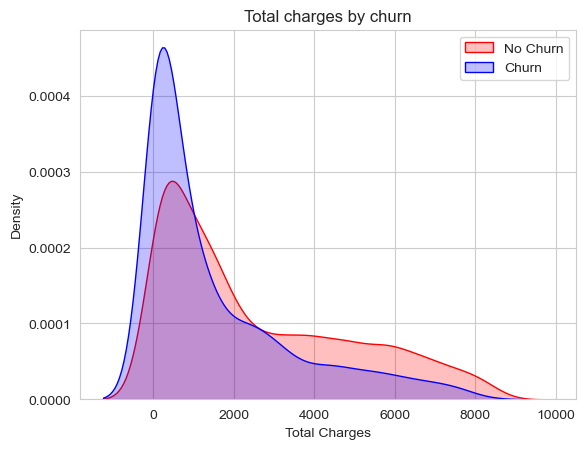

In [26]:
Tot = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(churn_data_dummies.TotalCharges[(churn_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

### Plotting the Heatmap to find the dependencies

<Axes: >

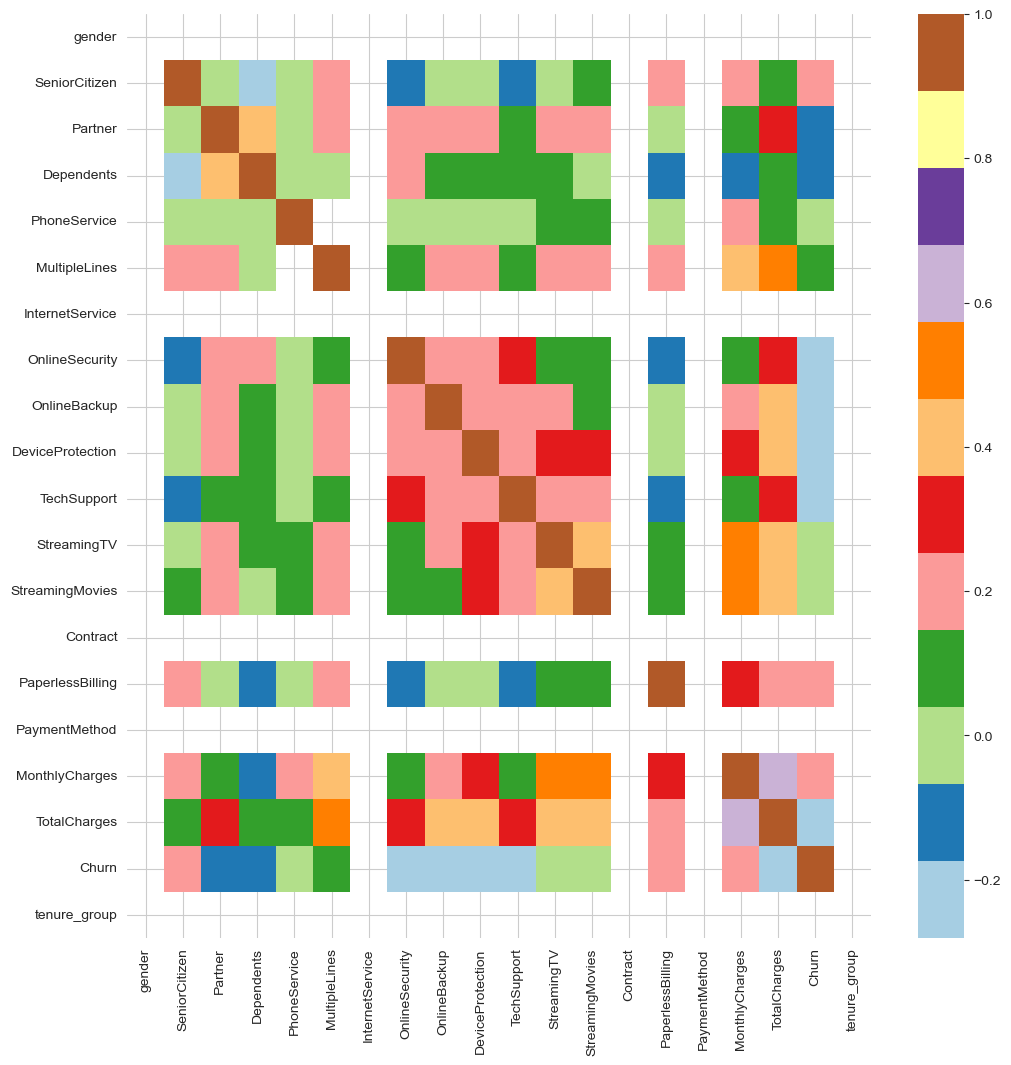

In [27]:
churn_data_dummies = churn_data_dummies.apply(pd.to_numeric, errors='coerce')


plt.figure(figsize=(12,12))
sns.heatmap(churn_data_dummies.corr(), cmap="Paired")

### Bivariate Analysis

In [28]:
new_df1_target0=churn_data.loc[churn_data["Churn"]==0]
new_df1_target1=churn_data.loc[churn_data["Churn"]==1]

In [29]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

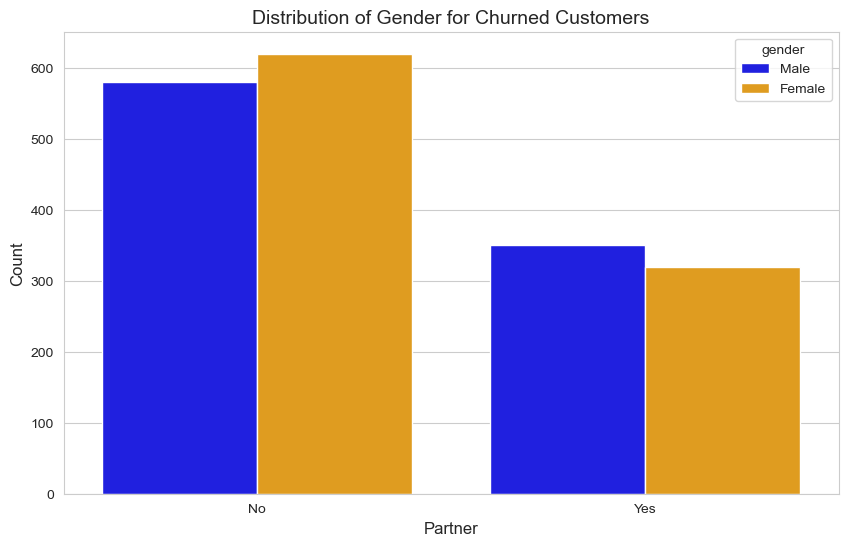

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1_target1[new_df1_target1["Churn"] == 1], x="Partner", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.title("Distribution of Gender for Churned Customers", fontsize=14)
plt.xlabel("Partner", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


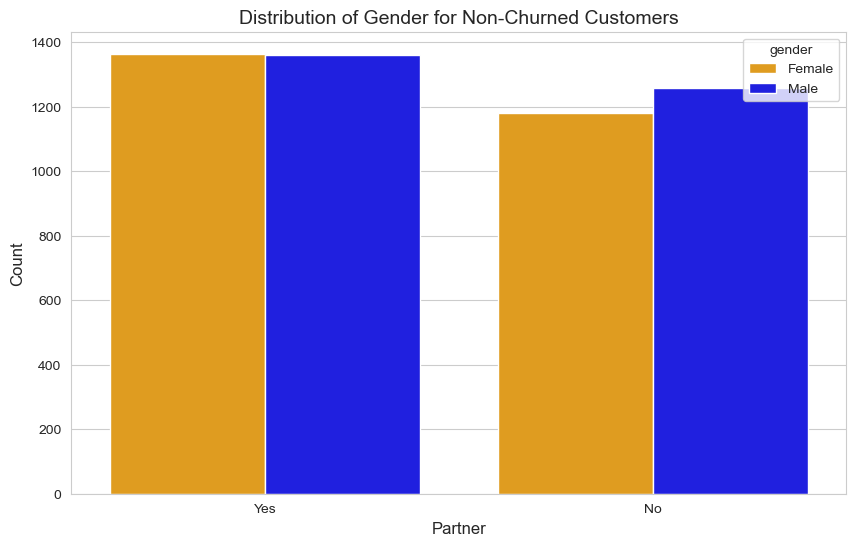

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1_target0[new_df1_target0["Churn"] == 0], x="Partner", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.title("Distribution of Gender for Non-Churned Customers", fontsize=14)
plt.xlabel("Partner", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

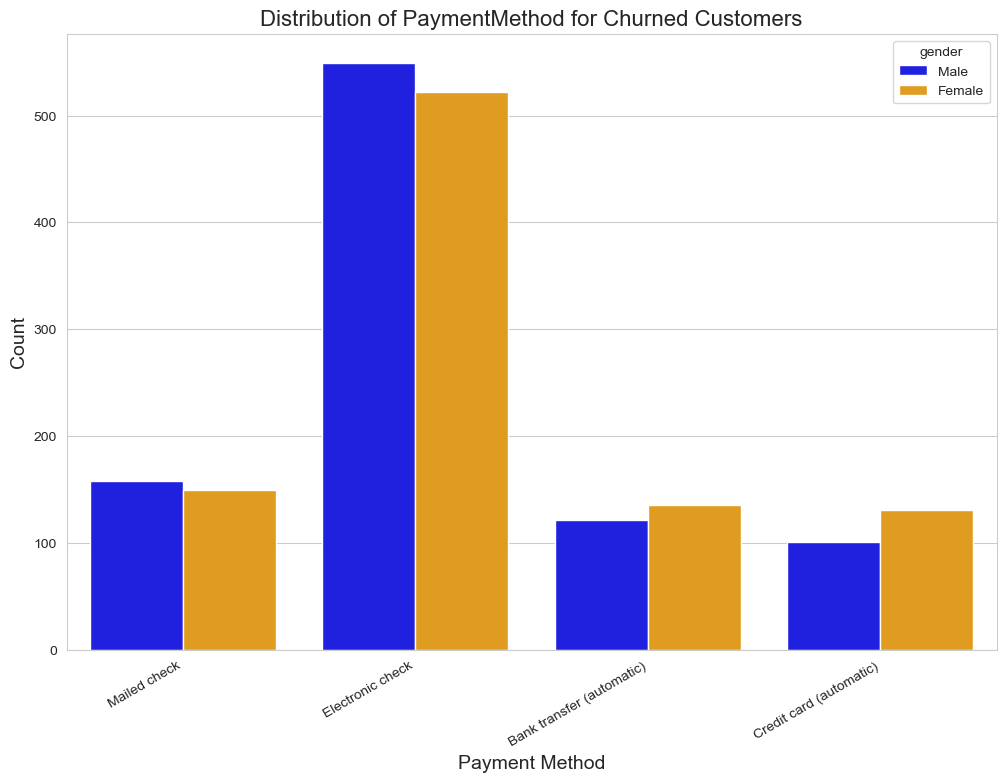

In [32]:
plt.figure(figsize=(12, 8))
sns.countplot(data=new_df1_target1[new_df1_target1["Churn"] == 1], x="PaymentMethod", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.xticks(rotation=30, ha="right")
plt.title("Distribution of PaymentMethod for Churned Customers", fontsize=16)
plt.xlabel("Payment Method", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

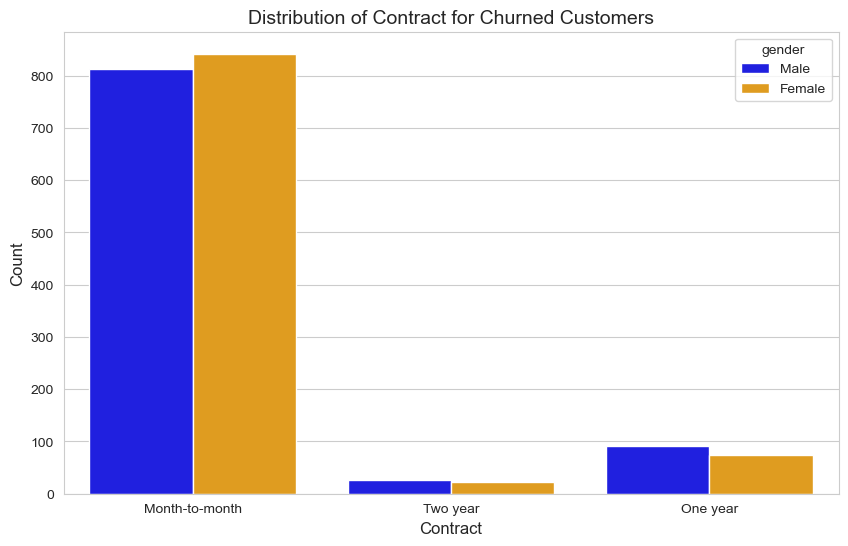

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1_target1[new_df1_target1["Churn"] == 1], x="Contract", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.title("Distribution of Contract for Churned Customers", fontsize=14)
plt.xlabel("Contract", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()


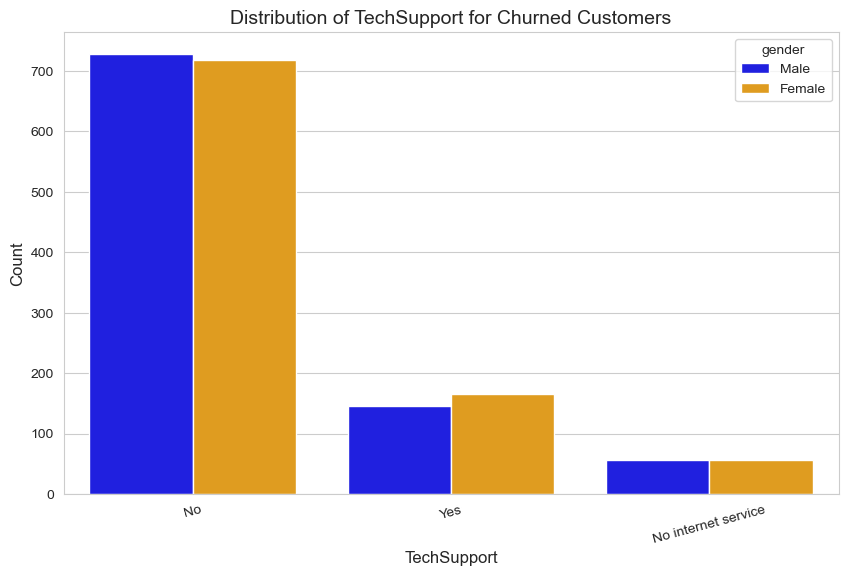

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1_target1[new_df1_target1["Churn"] == 1], x="TechSupport", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.title("Distribution of TechSupport for Churned Customers", fontsize=14)
plt.xlabel("TechSupport", fontsize=12); plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.show()


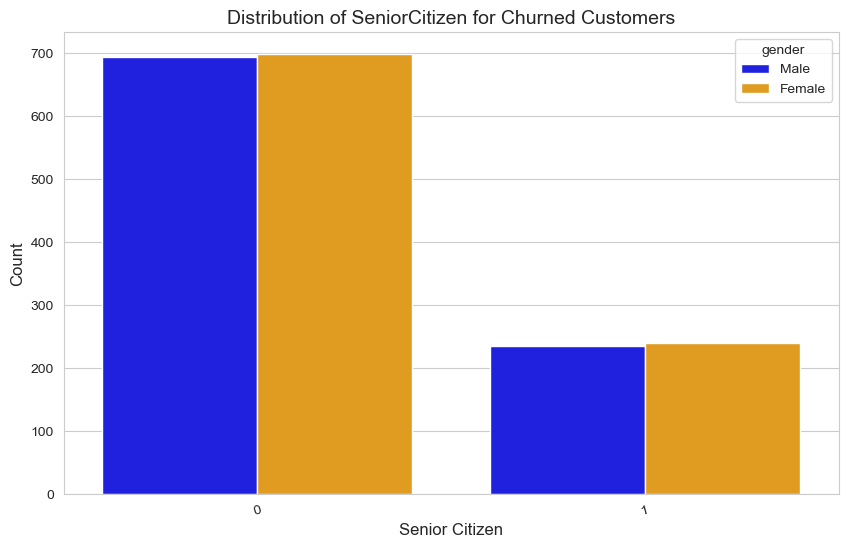

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(data=new_df1_target1, x="SeniorCitizen", hue="gender", palette={"Male": "blue", "Female": "orange"})
plt.title("Distribution of SeniorCitizen for Churned Customers", fontsize=14)
plt.xlabel("Senior Citizen", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=15)
plt.show()


# Saving the proccessed dataset in new CSV file 

In [36]:
churn_data_dummies.to_csv('tel_churn.csv')